In [325]:
import pandas as pd
import numpy as np

In [326]:
# Cargar el dataset
data = pd.read_csv("train.csv")
data_Test = pd.read_csv("test.csv")

df = data.copy()
df_Test = data_Test.copy()

#df = df.drop(["id","laptop_ID","Price_euros"], axis=1)
#df_Test = df_Test.drop(["id","laptop_ID"], axis=1)

df.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,749.00
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2kg,449.00
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1460.00
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2868.99
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.26kg,1713.37


In [327]:
# Información general
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB
None


In [328]:
# Estadísticas descriptivas
print(df.describe())

                id    laptop_ID      Inches  Price_euros
count   912.000000   912.000000  912.000000   912.000000
mean    645.091009   666.192982   15.011404  1108.122873
std     380.313813   384.873846    1.411744   714.597741
min       0.000000     1.000000   10.100000   174.000000
25%     319.750000   330.500000   14.000000   589.000000
50%     636.500000   673.500000   15.600000   949.000000
75%     980.250000   998.500000   15.600000  1458.500000
max    1302.000000  1320.000000   18.400000  6099.000000


In [329]:
import matplotlib.pyplot as plt
import seaborn as sns

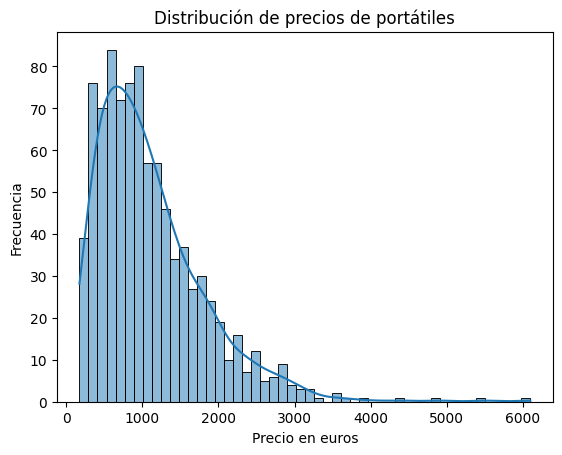

In [330]:
# Histograma de precios
sns.histplot(data["Price_euros"], bins=50, kde=True)
plt.xlabel("Precio en euros")
plt.ylabel("Frecuencia")
plt.title("Distribución de precios de portátiles")
plt.show()

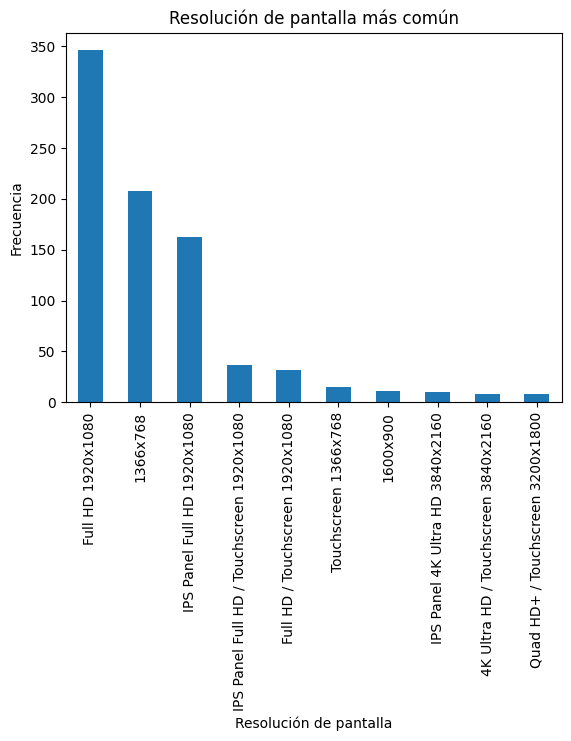

In [331]:
df["ScreenResolution"].value_counts().head(10).plot(kind='bar')
plt.xlabel("Resolución de pantalla")    
plt.ylabel("Frecuencia")
plt.title("Resolución de pantalla más común")
plt.show()
# Gráfico de barras de marcas más comunes

# EVALUACIÓN DEL DATASET:
De acuerdo a lo observado, gran parte de las variables son de tipo object, lo que nos motiva a evaluar el dataset y considerar transformar, de acuerdo a su naturaleza, las variables que sean susceptibles de ser transformadas en numéricas.

In [332]:
# Entre las variables que intentaremos trasnformar están:
# Weight, Ram, y Memory

# Transformación de Weight (Simplmente eliminamos la unidad kg y convertimos a float)
df["Weight_kg"] = df["Weight"].str.replace("kg", "").astype(float)

# Transformación de RAM 
df["Ram_GB"] = df["Ram"].str.replace("GB", "").astype(int)



In [333]:
# Dado que puede haber múltiples unidades de almacenamiento (GB/TB), 
# vamos a crear una nueva variable que agrupe todo en GB.
import re

# Función para convertir Memory en GB
def convert_memory(memory):
    # Separar múltiples unidades de almacenamiento
    parts = memory.split(" + ")
    total_gb = 0
    
    for part in parts:
        # Extraer el número y la unidad (GB/TB)
        match = re.search(r'(\d+\.?\d*)(TB|GB)', part)
        if match:
            size, unit = float(match.group(1)), match.group(2)
            if unit == "TB":
                size *= 1000  # Convertir TB a GB
            total_gb += size
    
    return total_gb

# Aplicar la función al dataset y crear la nueva variable
df["Memory_GB"] = df["Memory"].apply(convert_memory)

# Mostrar resultados
print(df[["Memory", "Memory_GB"]].head())


# Verificamos que los datos se transformaron correctamente
print(df[["Weight", "Weight_kg", "Ram", "Ram_GB", "Memory", "Memory_GB"]].head())

                 Memory  Memory_GB
0               1TB HDD     1000.0
1               1TB HDD     1000.0
2             256GB SSD      256.0
3  256GB SSD +  1TB HDD     1256.0
4             256GB SSD      256.0
   Weight  Weight_kg   Ram  Ram_GB                Memory  Memory_GB
0  2.36kg       2.36   8GB       8               1TB HDD     1000.0
1     2kg       2.00   4GB       4               1TB HDD     1000.0
2   1.2kg       1.20   8GB       8             256GB SSD      256.0
3  4.42kg       4.42  16GB      16  256GB SSD +  1TB HDD     1256.0
4  1.26kg       1.26   8GB       8             256GB SSD      256.0


### Características que contiene de forma conjunta la variable resolución.

- IPS es una tecnología de panel caracterizada por usar cristales líquidos alineados en paralelo que se intercalan entre 2 superficies de vidrio. Sus siglas significa "In-Plane Switching"
- La resolución Full HD, también conocida como FHD o 1080p, es una de las resoluciones más populares en la actualidad.
- Comenzaremos por la resolución HD, que significa Alta Definición. La resolución HD se refiere a una resolución de 1280x720 píxeles
- QHD: cuatro veces la resolución HD
La resolución QHD, también conocida como Quad HD o 2K, ofrece cuatro veces la resolución del HD estándar.
- UHD: Ultra alta definición
La resolución UHD, también conocida como Ultra Alta Definición o 4K, es la última evolución en calidad de imagen. Se refiere a una resolución de 3840x2160 píxeles, lo que significa que la pantalla tiene 3840 píxeles en el eje horizontal y 2160 píxeles en el eje vertica
- 4K: el estándar actual más común y de mejor calidad
El término 4K se utiliza comúnmente para referirse a la resolución UHD, ya que tiene aproximadamente 4000 píxeles en el eje horizontal.


### Notas de Comentario
Tenoendo en cuenta las diversas características que están de forma conjunta en la resolución, es conveniente hacer una mayor distinción en los tipos de resolución creando variables por separado para cada característica adicional a la dimensión de la resolución en si misma, es decir: Hd, Full HD, 4K, Quad , IPS Panel, Touchscreen.

Separar estas características o propiedades adicionales de la resolución en variables independientes nos permitirá capturar mejor el impacto de cada tecnología en el precio. Esto nos dará más flexibilidad al analizar cada factor por separado.. Sin embargo, en aras de explorar los posibles modelos, haremos pruebas tanto con la variable y sus características en resolución por separado y en conjunto. Dicho lo anterior:

Vamos a crear variables binarias (0 o 1) que representen la presencia de cada característica:
- HD (1 si la resolución es 1366x768 o 1600x900, 0 en caso contrario)
- Full HD (1920x1080)
- Quad HD+ (2560x1440 y 3200x1800)
- 4K Ultra HD (3840x2160)
- IPS Panel (Si contiene "IPS Panel" en el nombre)
- Touchscreen (Si contiene "Touchscreen")

In [334]:
# Crear variables binarias para cada tipo de resolución
df["HD"] = df["ScreenResolution"].apply(lambda x: 1 if "1366x768" in x or "1600x900" in x else 0)
df["Full_HD"] = df["ScreenResolution"].apply(lambda x: 1 if "1920x1080" in x else 0)
df["Quad_HD"] = df["ScreenResolution"].apply(lambda x: 1 if "2560x1440" in x or "3200x1800" in x else 0)
df["Ultra_HD_4K"] = df["ScreenResolution"].apply(lambda x: 1 if "3840x2160" in x else 0)
df["IPS_Panel"] = df["ScreenResolution"].apply(lambda x: 1 if "IPS Panel" in x else 0)
df["Touchscreen"] = df["ScreenResolution"].apply(lambda x: 1 if "Touchscreen" in x else 0)

# Verificamos los resultados
print(df[["ScreenResolution", "HD", "Full_HD", "Quad_HD", "Ultra_HD_4K", "IPS_Panel", "Touchscreen"]].head())


                  ScreenResolution  HD  Full_HD  Quad_HD  Ultra_HD_4K  \
0                         1366x768   1        0        0            0   
1                         1366x768   1        0        0            0   
2                Full HD 1920x1080   0        1        0            0   
3  IPS Panel 4K Ultra HD 3840x2160   0        0        0            1   
4  Full HD / Touchscreen 1920x1080   0        1        0            0   

   IPS_Panel  Touchscreen  
0          0            0  
1          0            0  
2          0            0  
3          1            0  
4          0            1  


Está claro que  no hay una relación lienal en tendencia respecto del precio y la resolución si consideramos la variable que muestra con todas sus características conjuntas. Podrían ser diversas las razones, es por ello que, haremos pruebas con la variable conjunta y las variables que hemos creado.

In [335]:
import statsmodels.api as sm


In [336]:
def clasificar_segmento(modelo):
    modelo = modelo.lower()
    if any(marca in modelo for marca in ['thinkpad', 'elitebook', 'probook', 'latitude', 'portege', 'tecra', 'lifebook']):
        return "Empresarial"
    elif any(marca in modelo for marca in ['inspiron', 'vivobook', 'zenbook', 'ideapad', 'aspire']):
        return "Consumo general"
    elif any(marca in modelo for marca in ['alienware', 'rog', 'omen', 'predator', 'legion', 'zbook', 'precision', 'msi']):
        return "Alto rendimiento / Gaming"
    elif any(marca in modelo for marca in ['xps', 'yoga', 'spectre', 'swift', 'surface']):
        return "Ultrabook / Convertible"
    elif 'chromebook' in modelo:
        return "Educación / ChromeOS"
    else:
        return "Otro / Indefinido"

# Función para detectar sistema operativo (si aparece mencionado)
def clasificar_sistema(modelo):
    modelo = modelo.lower()
    if 'linux' in modelo:
        return "Linux"
    elif 'chrome' in modelo:
        return "ChromeOS"
    elif "mac" in modelo:
        return "MacOS"
    elif 'android' in modelo:
        return "Android"
    elif any(w in modelo for w in ['w10', 'windows']):
        return "Windows"
    else:
        return "No especificado"
    
def clasificar_procesador(modelo):
    modelo = modelo.lower()
    if 'amd' in modelo:
        return "AMD"
    elif 'intel' in modelo:
        return "Intel"
    else:
        return "Otro_Indefinido"
    
def clasificar_gpu(modelo):
    modelo = modelo.lower()
    if 'amd' in modelo:
        return "AMD_gpu"
    elif 'intel' in modelo:
        return "Intel_gpu"
    else:
        return "Otro_gpu"    



df['Segmento_de_uso'] = df['Product'].apply(clasificar_segmento)
df['OS'] = df['OpSys'].apply(clasificar_sistema)
df['Procesador'] = df['Cpu'].apply(clasificar_procesador)
df['Card_gpu'] = df['Gpu'].apply(clasificar_gpu)

In [337]:
from sklearn import metrics
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet,RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error,mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, cross_val_predict

In [338]:
# Transformación de Weight (Simplmente eliminamos la unidad kg y convertimos a float)
df_Test["Weight_kg"] = df_Test["Weight"].str.replace("kg", "").astype(float)

# Transformación de RAM 
df_Test["Ram_GB"] = df_Test["Ram"].str.replace("GB", "").astype(int)

df_Test["Memory_GB"] = df_Test["Memory"].apply(convert_memory)

df_Test["HD"] = df_Test["ScreenResolution"].apply(lambda x: 1 if "1366x768" in x or "1600x900" in x else 0)
df_Test["Full_HD"] = df_Test["ScreenResolution"].apply(lambda x: 1 if "1920x1080" in x else 0)
df_Test["Quad_HD"] = df_Test["ScreenResolution"].apply(lambda x: 1 if "2560x1440" in x or "3200x1800" in x else 0)
df_Test["Ultra_HD_4K"] = df_Test["ScreenResolution"].apply(lambda x: 1 if "3840x2160" in x else 0)
df_Test["IPS_Panel"] = df_Test["ScreenResolution"].apply(lambda x: 1 if "IPS Panel" in x else 0)
df_Test["Touchscreen"] = df_Test["ScreenResolution"].apply(lambda x: 1 if "Touchscreen" in x else 0)

df_Test['Segmento_de_uso'] = df_Test['Product'].apply(clasificar_segmento)
df_Test['OS'] = df_Test['OpSys'].apply(clasificar_sistema)
df_Test['Procesador'] = df_Test['Cpu'].apply(clasificar_procesador)
df_Test['Card_gpu'] = df_Test['Gpu'].apply(clasificar_gpu)

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
 14  Weight_kg         912 non-null    float64
 15  Ram_GB            912 non-null    int64  
 16  Memory_GB         912 non-null    float64
 1

In [290]:
df = pd.get_dummies(df,columns=["Segmento_de_uso","TypeName","Company","OS","Procesador","Card_gpu"],dtype=int)
df_Test = pd.get_dummies(df_Test,columns=["Segmento_de_uso","TypeName","Company","OS","Procesador","Card_gpu"],dtype=int)


In [291]:
X_Test = df_Test[['Inches','Weight_kg','Ram_GB',"HD",'Quad_HD','Ultra_HD_4K',
                         'Segmento_de_uso_Consumo general','Segmento_de_uso_Alto rendimiento / Gaming',
                         'Segmento_de_uso_Empresarial',
                         'Segmento_de_uso_Otro / Indefinido',
                         'OS_ChromeOS','OS_MacOS','OS_Linux','OS_No especificado',
                         'Company_Google','Company_Acer', 'Company_Asus','Company_Dell',
                         'Company_LG', 'Company_MSI','Company_Google','Company_HP','Company_Lenovo','Company_Samsung',
                         'Company_Razer', 'Company_Microsoft',
                         'TypeName_2 in 1 Convertible', 
                         'TypeName_Gaming', 
                         'TypeName_Netbook',
                         'TypeName_Notebook', 
                         'TypeName_Ultrabook', 
                         'TypeName_Workstation',
                         #'Procesador_AMD',
                         'Procesador_AMD', 'Procesador_Intel', 'Card_gpu_AMD_gpu',
       'Card_gpu_Intel_gpu', 'Card_gpu_Otro_gpu']]  # Agregar constante para el modelo


In [292]:
X = df[['Inches','Weight_kg','Ram_GB',"HD",'Quad_HD','Ultra_HD_4K',#'Touchscreen',
                         'Segmento_de_uso_Consumo general','Segmento_de_uso_Alto rendimiento / Gaming',
                         'Segmento_de_uso_Empresarial',
                         'Segmento_de_uso_Otro / Indefinido',
                         'OS_ChromeOS','OS_MacOS','OS_Linux','OS_No especificado',
                         'Company_Google','Company_Acer', 'Company_Asus','Company_Dell',#'Company_Chuwi',
                         'Company_LG', 'Company_MSI','Company_Google','Company_HP','Company_Lenovo','Company_Samsung',
                         'Company_Razer','Company_Microsoft',#'Company_Vero',
                         'TypeName_2 in 1 Convertible', 
                         'TypeName_Gaming', 
                         'TypeName_Netbook',
                         'TypeName_Notebook', 
                         'TypeName_Ultrabook', 
                         'TypeName_Workstation',
                         #'Procesador_AMD'
                         'Procesador_AMD', 'Procesador_Intel', 'Card_gpu_AMD_gpu',
       'Card_gpu_Intel_gpu', 'Card_gpu_Otro_gpu']]




In [293]:
y = data["Price_euros"]

# Selección de la muestra de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [294]:
predictions = linear_model.predict(X_test)
predictions

array([1758.53988965, 1261.39149533, 1189.53111677, 1082.12335466,
       1603.16717863,  435.74182199,  444.42535518,  249.00703583,
        364.18413   ,  803.32181359,  271.67098792, 1899.78235689,
        602.06562319, 1180.6710462 ,  588.22007139, 1157.11513614,
        441.88557815, 1785.05843109,  186.1096663 ,  838.57960679,
        556.926919  , 1167.14758948, 1509.55149105,  937.20453818,
       1302.13503033,  584.68224609, 1283.40370081,  555.08604328,
       1480.19812648, 1511.76626596,  558.73586316, 2174.27059596,
        488.30602358,  774.54068365,  476.42337583,  421.50696137,
        213.4716944 , 2023.29887091, 1471.26675578, 1947.49461553,
       1276.5611413 , 1281.62333036, 2111.77258844,  299.54901991,
        636.09371505,  271.67098792, 1325.557745  ,  701.94607058,
       1235.26081704, 1162.75650554, 1610.21873727, 1612.25097658,
        880.69020321, 1440.61712417,  993.41942593,  900.84019061,
        291.75292474,  382.43174099, 1386.61100317, 1106.82696

In [295]:
print('MAE_train:', metrics.mean_absolute_error(y_train, linear_model.predict(X_train)))

print('MAE:', metrics.mean_absolute_error(y_test, linear_model.predict(X_test)))


MAE_train: 214.4164029841322
MAE: 224.41197956030462


In [296]:
y_pred = linear_model.predict(X_Test)
pd_join = pd.DataFrame({'id': data_Test['id'], 'Price_euros': y_pred})
pd_join.to_csv('predictions.csv', index=False)
pd_join.head()

,id,Price_euros
0,181,2235.764971
1,708,555.470713
2,862,322.183237
3,1064,1145.869006
4,702,665.129739


In [297]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np


In [298]:
poly_feats = PolynomialFeatures(degree = 2)
poly_feats.fit(X_train)
X_poly = poly_feats.transform(X_train)

linear_model.fit(X_poly, y_train)


LinearRegression()

In [299]:
poly_feats.fit(X_test)
X_poly_test = poly_feats.transform(X_test)
Polypredictions = linear_model.predict(X_poly_test)

In [300]:
print('MAE_train:', metrics.mean_absolute_error(y_train, linear_model.predict(X_poly)))
print('MAE_test:', metrics.mean_absolute_error(y_test, linear_model.predict(X_poly_test)))



MAE_train: 133.6562401074089
MAE_test: 244.55564947490555


In [301]:
corr = df.corr(numeric_only=True)
corr

,Inches,Weight_kg,Ram_GB,Memory_GB,HD,Full_HD,Quad_HD,Ultra_HD_4K,IPS_Panel,Touchscreen,...,OS_ChromeOS,OS_Linux,OS_MacOS,OS_No especificado,OS_Windows,Procesador_AMD,Procesador_Intel,Card_gpu_AMD_gpu,Card_gpu_Intel_gpu,Card_gpu_Otro_gpu
Inches,1.000000,0.830464,0.245243,0.514907,-0.008889,0.154060,-0.171537,0.041070,-0.099530,-0.370802,...,-0.212398,0.101809,-0.185552,0.092471,0.061534,0.109458,-0.109458,0.192469,-0.570118,0.475359
Weight_kg,0.830464,1.000000,0.416750,0.551652,-0.037792,0.135743,-0.161641,0.096534,0.015827,-0.275896,...,-0.130649,0.066496,-0.157769,0.028874,0.068901,0.055604,-0.055604,0.102697,-0.586449,0.560181
Ram_GB,0.245243,0.416750,1.000000,0.381714,-0.401318,0.191150,0.120629,0.332801,0.210111,0.125682,...,-0.100554,-0.094048,0.027802,-0.100621,0.157881,-0.104465,0.104465,-0.090118,-0.351400,0.448988
Memory_GB,0.514907,0.551652,0.381714,1.000000,-0.050668,0.072521,-0.058329,0.098560,-0.004383,-0.129168,...,-0.172985,0.033067,-0.079659,0.006747,0.085516,0.060712,-0.060712,0.137164,-0.458682,0.395661
HD,-0.008889,-0.037792,-0.401318,-0.050668,1.000000,-0.793644,-0.108303,-0.117602,-0.343237,-0.135485,...,0.148546,0.097216,-0.063953,0.109476,-0.162317,0.103036,-0.103036,0.028490,0.249802,-0.292591
Full_HD,0.154060,0.135743,0.191150,0.072521,-0.793644,1.000000,-0.240671,-0.261334,0.175676,-0.099985,...,-0.152114,-0.051537,-0.183028,-0.054083,0.208600,-0.050435,0.050435,0.041189,-0.277279,0.270364
Quad_HD,-0.171537,-0.161641,0.120629,-0.058329,-0.108303,-0.240671,1.000000,-0.035662,0.066024,0.277812,...,0.015533,-0.013978,-0.024977,-0.040802,0.038141,-0.038814,0.038814,-0.071217,0.144013,-0.103189
Ultra_HD_4K,0.041070,0.096534,0.332801,0.098560,-0.117602,-0.261334,-0.035662,1.000000,0.132771,0.228944,...,-0.029466,-0.045870,-0.027121,-0.044306,0.080234,-0.042147,0.042147,-0.077332,-0.122375,0.190697
IPS_Panel,-0.099530,0.015827,0.210111,-0.004383,-0.343237,0.175676,0.066024,0.132771,1.000000,0.150725,...,-0.044494,-0.135804,0.164901,-0.039667,0.055078,-0.087389,0.087389,-0.111770,-0.065091,0.154217
Touchscreen,-0.370802,-0.275896,0.125682,-0.129168,-0.135485,-0.099985,0.277812,0.228944,0.150725,1.000000,...,0.064740,-0.082731,-0.057197,-0.093439,0.089482,-0.088886,0.088886,-0.144894,0.239780,-0.152142


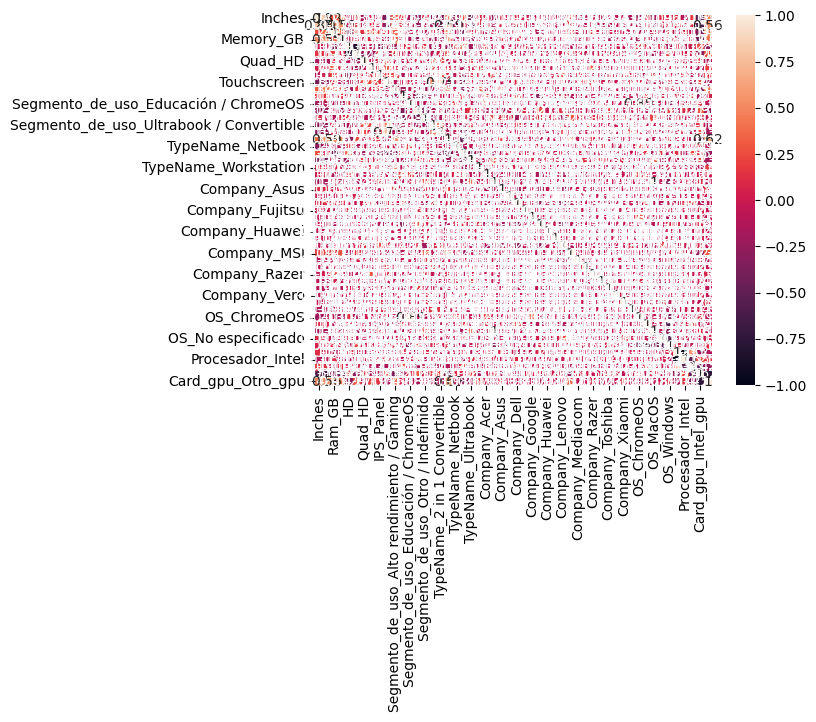

In [302]:
sns.heatmap(corr, annot=True);

In [303]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet,RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error

In [304]:
from sklearn import preprocessing

test_size = 0.20
random_seed = 42
RIDGE_alphas = np.logspace(-100, 100, 100)
LASSO_alphas = np.logspace(-100, 100, 100)
ELN_alphas = np.logspace(-100, 100, 100)
RF_alphas = np.logspace(-100, 100, 100)


# Estandarización
std_scale= preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std  = std_scale.transform(X_test)
X_Test_std = std_scale.transform(X_Test)


# Ajustes
models = {
    "Ridge" : RidgeCV(alphas=RIDGE_alphas, cv=5),
    "Lasso" : LassoCV(alphas=LASSO_alphas, cv=5, max_iter=1000),
    "ElasticNet" : ElasticNetCV(alphas=ELN_alphas, l1_ratio=1,cv=5, max_iter=1000),
    'random_forest': RandomForestRegressor(random_state=42)
}

results_pred = []
results_train = []


for name, model in models.items():
    model.fit(X_train_std, y_train)
    y_pred_train = model.predict(X_train_std)
    y_pred_test = model.predict(X_test_std)
    y_pred_Test = model.predict(X_Test)
    mae_train = metrics.mean_absolute_error(y_train, model.predict(X_train_std))
    mae_test = metrics.mean_absolute_error(y_test, model.predict(X_test_std))
    model.fit(X,y)
    mae_Ftrain = metrics.mean_absolute_error(y, model.predict(X))
    y_predF_Test = model.predict(X_Test)
    results_train.append({"Modelo": name, 
                    "MAE_train": mae_train,
                    "MAE_test":mae_test,
                    "MAE_data": mae_Ftrain,
                    })
    results_pred.append({
                    "y_pred_Test":y_pred_Test,
                    "y_pred_Test":y_pred_Test
                    })

    



perf_df = (pd.DataFrame(results_train)
           .sort_values("MAE_train")
           .reset_index(drop=True))
print("\n── PERFORMANCE (variables estandarizadas-ENTRENAMIENTO) ──")
print(perf_df.to_string(index=False))



── PERFORMANCE (variables estandarizadas-ENTRENAMIENTO) ──
       Modelo  MAE_train   MAE_test   MAE_data
random_forest  92.026636 198.120880  91.575526
        Ridge 214.247981 223.210984 223.709545
        Lasso 218.926275 228.244086 216.583003
   ElasticNet 218.926275 228.244086 216.583003


In [305]:
# Seleccionamos el mejor
best_name  = perf_df.loc[0, "Modelo"]
best_model = models[best_name]


print(f"\n► Mejor modelo: {best_name}")
print("Coeficientes (β_std):")



► Mejor modelo: random_forest
Coeficientes (β_std):


# Predicciones finales

In [306]:
import numpy as np
import pandas as pd

# Importación de librerías de scikit-learn
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

# Importación de modelos de regresión
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

# =============================================================================
# 1. Carga de datos
# =============================================================================

# Supongamos que tus datos están en archivos CSV:
# "train.csv" contiene la variable target y las covariables
# "test.csv" contiene solo las covariables (sin target)

#train_df = X  # Asegúrate de que incluya la columna 'target'
#test_df = X_test    # Este DF no debe tener la columna 'target'

# Separar covariables y target en los datos de entrenamiento
X_train = X
y_train = y

# Datos de prueba: solo covariables
X_test = X_test

# =============================================================================
# 2. Definición de modelos y grids de hiperparámetros
# =============================================================================

# Diccionario con los 4 modelos a evaluar
models = {
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(objective="reg:squarederror", random_state=42, verbosity=0),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "LightGBM": lgb.LGBMRegressor(random_state=42,)
}

# Parámetros a buscar para cada modelo dentro del pipeline (el prefijo 'regressor__' es necesario)
param_grids = {
    "AdaBoost": {
        "regressor__n_estimators": [30,35, 150, 100, 200],
        "regressor__learning_rate": [0.01, 0.1, 1.0]
    },
    "XGBoost": {
        "regressor__n_estimators": [30,35, 150, 100, 200],
        "regressor__learning_rate": [0.01, 0.1, 0.2],
        "regressor__max_depth": [3, 5, 7]
    },
    "GradientBoosting": {
        "regressor__n_estimators": [30,35, 150, 100, 200],
        "regressor__learning_rate": [0.01, 0.1, 0.2],
        "regressor__max_depth": [3, 5, 7]
    },
    "LightGBM": {
        "regressor__n_estimators": [30, 35, 150, 100, 200],
        "regressor__learning_rate": [0.01, 0.1, 0.2],
        "regressor__max_depth": [3, 5, 7]
    }
}

# =============================================================================
# 3. Pipeline, búsqueda de hiperparámetros y validación cruzada
# =============================================================================

# Diccionarios para almacenar los resultados y los mejores modelos encontrados
results = {}
best_models = {}

# Para cada modelo, se crea un pipeline que primero estandariza los datos y luego ajusta el modelo.
# Se realiza una búsqueda de hiperparámetros usando GridSearchCV y la métrica "Mean Absolute Error" (MAE)
for name, model in models.items():
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("regressor", model)
    ])
    
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grids[name],
        scoring="neg_mean_absolute_error",  # Se usa el negativo porque scikit‑learn maximiza la puntuación
        cv=5,
        n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    
    # Se almacena el mejor pipeline y el error obtenido en validación cruzada (convierte a positivo)
    best_models[name] = grid_search.best_estimator_
    results[name] = {
        "Best_Params": grid_search.best_params_,
        "CV_MAE": -grid_search.best_score_
    }
    print(f"{name} completado. MAE (CV): {-grid_search.best_score_:.4f}")

# Mostramos la comparación de modelos según el MAE obtenido en validación cruzada
results_df = pd.DataFrame(results).T
print("\nComparación de modelos (CV MAE):")
print(results_df)

# =============================================================================
# 4. Selección del mejor modelo y predicción en el conjunto de prueba
# =============================================================================

# Se selecciona el modelo con el menor MAE en validación cruzada
best_model_name = min(results, key=lambda name: results[name]["CV_MAE"])
best_model = best_models[best_model_name]
print(f"\nEl mejor modelo es: {best_model_name} con CV MAE: {results[best_model_name]['CV_MAE']:.4f}")

# Una vez seleccionado, se usan todos los datos de entrenamiento para ajustar (ya se hizo dentro de GridSearchCV)
# y se realiza la predicción sobre el conjunto de prueba
test_predictions = best_model.predict(X_Test)

# Se pueden guardar las predicciones en un archivo CSV para su posterior análisis o entrega




AdaBoost completado. MAE (CV): 285.0003
XGBoost completado. MAE (CV): 199.3199
GradientBoosting completado. MAE (CV): 198.4238
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 912, number of used features: 28
[LightGBM] [Info] Start training from score 1108.122872
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

In [307]:
pred_df = pd.DataFrame({
        'id': data_Test.id.values,
        'Price_euros': test_predictions
    }).sort_values('id')



    # Guardar CSV
pred_df.to_csv(f'Boostingx_predicciones_{best_model_name}.csv', index=False)


In [308]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from scipy.stats import uniform, randint
import warnings
warnings.filterwarnings("ignore")

In [203]:
df.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu_speed_GHz,ScreenQuality_Ordinal,Memory_Total_GB,Cpu_brand,Cpu_model
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,749.00,2.7,1,1000,Intel,Core i7
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Intel HD Graphics 505,Windows 10,2.00,449.00,1.1,1,1000,Intel,Pentium Quad
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.20,1460.00,2.3,2,256,Intel,Core i5
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,2868.99,2.8,4,1256,Intel,Core i7
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,1713.37,2.4,2,256,Intel,Core i5


In [344]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from scipy.stats import uniform, randint
import warnings
warnings.filterwarnings("ignore")
target = "Price_euros"
 
categorical_features =['Company', 'TypeName', 'Segmento_de_uso', 'OS', 'Procesador', 'Card_gpu']
numerical_features =['Inches', 'Weight_kg', 'Ram_GB','Memory_GB', 'HD', 'Full_HD', 'Quad_HD', 'Ultra_HD_4K', 'IPS_Panel','Touchscreen']

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

X = df[numerical_features + categorical_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =====================
# 4. Modelos y búsqueda aleatoria
# =====================
models_params = {
    "Ridge": (Ridge(), {
        "regressor__alpha": uniform(0.01, 10)
    }),
    "Lasso": (Lasso(), {
        "regressor__alpha": uniform(0.01, 10)
    }),
    "ElasticNet": (ElasticNet(), {
        "regressor__alpha": uniform(0.01, 10),
        "regressor__l1_ratio": uniform(0, 1)
    }),
    "GradientBoosting": (GradientBoostingRegressor(random_state=42), {
        "regressor__n_estimators": randint(100, 300),
        "regressor__max_depth": randint(3, 10),
        "regressor__learning_rate": uniform(0.01, 0.3),
        "regressor__subsample": uniform(0.5, 0.5)
    }),
    "RandomForest": (RandomForestRegressor(random_state=42), {
        "regressor__n_estimators": randint(100, 300),
        "regressor__max_depth": randint(3, 15)
    }),
    "XGB": (XGBRegressor(random_state=42, verbosity=0), {
        "regressor__n_estimators": randint(100, 300),
        "regressor__max_depth": randint(3, 10),
        "regressor__learning_rate": uniform(0.01, 0.3),
        "regressor__subsample": uniform(0.5, 0.5)
    })
}

results = {}
pred_modelos={}

for name, (model, params) in models_params.items():
    print(f"\nEntrenando modelo: {name}")
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])

    search = RandomizedSearchCV(
        estimator=pipe,
        param_distributions=params,
        n_iter=30,
        cv=5,
        scoring="neg_mean_absolute_error",
        random_state=42,
        n_jobs=-1
    )
    # AJUSTE
    search.fit(X_train, y_train)
    # Predicciones
    y_train_pred = search.predict(X_train)
    y_test_pred = search.predict(X_test)

    y_pred_Test = search.predict(df_Test[numerical_features + categorical_features])
    pred_modelos[name] = y_pred_Test    

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    diff = abs(mae_train - mae_test)

    print(f"MAE Train: {mae_train:.2f}, MAE Test: {mae_test:.2f}, Dif: {diff:.2f}")
    print("Mejores parámetros:", search.best_params_)

    results[name] = {
        "model": search.best_estimator_,
        "mae_train": mae_train,
        "mae_test": mae_test,
        "diff": diff
    }

# =====================
# 5. Elegir mejor modelo
# =====================
best_model_name = min(results, key=lambda k: results[k]["diff"])
best_model = results[best_model_name]["model"]
print(f"\n\nMEJOR MODELO FINAL (menor diferencia MAE): {best_model_name}")



Entrenando modelo: Ridge
MAE Train: 214.39, MAE Test: 220.38, Dif: 6.00
Mejores parámetros: {'regressor__alpha': np.float64(1.5699452033620265)}

Entrenando modelo: Lasso
MAE Train: 219.10, MAE Test: 226.58, Dif: 7.48
Mejores parámetros: {'regressor__alpha': np.float64(1.4049386065204184)}

Entrenando modelo: ElasticNet
MAE Train: 219.02, MAE Test: 222.81, Dif: 3.79
Mejores parámetros: {'regressor__alpha': np.float64(0.21584494295802448), 'regressor__l1_ratio': np.float64(0.9699098521619943)}

Entrenando modelo: GradientBoosting
MAE Train: 77.09, MAE Test: 170.73, Dif: 93.64
Mejores parámetros: {'regressor__learning_rate': np.float64(0.1266031869068446), 'regressor__max_depth': 4, 'regressor__n_estimators': 210, 'regressor__subsample': np.float64(0.9143687545759647)}

Entrenando modelo: RandomForest
MAE Train: 83.10, MAE Test: 182.38, Dif: 99.28
Mejores parámetros: {'regressor__max_depth': 14, 'regressor__n_estimators': 210}

Entrenando modelo: XGB
MAE Train: 70.25, MAE Test: 176.23, 

In [347]:
pd_join = pd.DataFrame({'id': data_Test['id'], 'Price_euros': pred_modelos["GradientBoosting"]})
pd_join.to_csv('GradientBoosting_Pipeline_best_predictions.csv', index=False)
pd_join.head()


pd_join = pd.DataFrame({'id': data_Test['id'], 'Price_euros': pred_modelos["XGB"]})
pd_join.to_csv('XGB_Pipeline_best_predictions.csv', index=False)
pd_join.head()

,id,Price_euros
0,181,1941.823853
1,708,599.946899
2,862,350.535919
3,1064,1380.870239
4,702,907.587952
